# SI 618 Homework 5: Natural Language Processing

## The total score for this assignment will be 100 points, consisting of:
- 10 pt: Overall quality of spelling, grammar, puctuation, etc. of written sentences.
- 10 pt: Codes are written in [PEP 8](https://www.python.org/dev/peps/pep-0008/) style.
- 80 pt: Homework questions. 

In [ ]:
MY_UNIQNAME = 'xinyexu'

# Download the data:
We will be using a subset of the data from [Project Gutenberg](http://www.gutenberg.org).

>Project Gutenberg is a volunteer effort to digitize and archive cultural works, to "encourage the creation and distribution of eBooks". It was founded in 1971 by American writer Michael S. Hart and is the oldest digital library. Most of the items in its collection are the full texts of public domain books. The project tries to make these as free as possible, in long-lasting, open formats that can be used on almost any computer., Project Gutenberg reached 57,000 items in its collection of free eBooks.

We will use a [cleaned up corpus](https://github.com/aparrish/gutenberg-dammit) that was processed by [Allison Parish](https://www.decontextualize.com/). This processing step was done to standardize metadata and text encoding. The dataset is described on the [project page](https://github.com/aparrish/gutenberg-dammit#gutenberg-dammit). Note that there are plain text files withing subdirectories numbered with the first three digits of the document ID, and there is also a JSON file of document metadata with title, author, and other information.


We created a reduced subset of 4000 documents for the purpose of this assignment that can be downloaded below:

https://drive.google.com/file/d/1V5ep_5veAccCD-YxGlVfv3DsXczBIvv5/view?usp=sharing

This ZIP file is approximately 550 MB compressed, and 1.45 GB uncompressed.

## Q1. (10 pts.) Data cleaning
- (3 pts.) Import the downloaded data
- (2 pts.) Convert to lowercase
- (2 pts.) Remove stopwords 
- (2 pts.) Remove punctuation and any other non-alphabet characters

In [101]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
import spacy
%matplotlib inline

In [19]:
# You will need to do this only once
# ! python -m spacy download en

    100% |████████████████████████████████| 37.4MB 60.4MB/s ta 0:00:011
  Running setup.py install for en-core-web-sm ... done
You are using pip version 18.1, however version 19.0.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.

    Linking successful
    /anaconda2/lib/python2.7/site-packages/en_core_web_sm -->
    /anaconda2/lib/python2.7/site-packages/spacy/data/en

    You can now load the model via spacy.load('en')



In [237]:
# import the downloaded data
import pandas as pd
import io
menu = pd.read_json('gutenberg-dammit-files/gutenberg-metadata.json')
files_name = menu['gd-path']
text = []
i = 0
for file in files_name:    
    with io.open('gutenberg-dammit-files/'+file, encoding = 'utf-8') as f:
        text.append(f.read())

In [238]:
# convert to lowercase
import re
sent_low = len(text)*[0]
for i in range(len(text)):
    sent_low[i] = text[i].lower()

In [239]:
sent_low[0][:200]

u"enlarge to full size\n\n\n\n\tcontents\n\n\n\tcasanova at dux\n\n\ttranslator's preface\n\n\tauthor's preface\n\n\n\tthe memoirs of jacques casanova\n\n\n\tvenetian years\n\n\n\tepisode 1 -- childhood\n\n\tchapter i\n\n\tchapter ii\n\n"

In [240]:
# stop words
from spacy.lang.en.stop_words import STOP_WORDS
sent_nostop = len(text)*[0]
for i in range(len(sent_low)):
    temp = sent_low[i]
    words = temp.split()
    words_nostop = [word for word in words if word not in STOP_WORDS]
    join_nostop = ' '.join(words_nostop)
    sent_nostop[i] = join_nostop

In [241]:
sent_nostop[0][:200]

u"enlarge size contents casanova dux translator's preface author's preface memoirs jacques casanova venetian years episode 1 -- childhood chapter chapter ii chapter iii chapter iv chapter v chapter vi c"

In [242]:
# use regular expression to remove punctuation:
# special character `\n` (linebreak) 
import os
# os.linesep : '\n'
sent_low_pnct = len(text)*[0]
for i in range(len(sent_nostop)):
    temp = sent_nostop[i]
    temo_low_pnct = re.sub(r'[^\w\s]', ' ', temp) # remove punctuation
    temo_low_pnct = re.sub(r'\d', " ", temo_low_pnct) # remove digits
    temo_low_pnct = temo_low_pnct.replace(os.linesep, "") # remove \n
    sent_low_pnct[i] = temo_low_pnct

In [243]:
sent_low_pnct[0][:200]

u'enlarge size contents casanova dux translator s preface author s preface memoirs jacques casanova venetian years episode      childhood chapter chapter ii chapter iii chapter iv chapter v chapter vi c'

## Q2. (10 pts.) Frequency of Part of Speech (POS) tags
- Use spaCy
  - Use the original (or uncleaned) documents. spaCy does POS tagging better when the sentence is more complete. 
- (4 pts.) Extract POS tags from the first 100 sentences of selected 5 books. 
- (4 pts.) Plot the frequency of POS tags
- (2 pts.) Provide your interpretation

In [79]:
# Select 5 books from original file
from gutenbergdammit.ziputils import retrieve_one
from gutenbergdammit.ziputils import loadmetadata
metadata = loadmetadata("gutenberg-dammit-files.zip")
text = ''
for i in range(2,7):
    text += retrieve_one("gutenberg-dammit-files.zip", metadata[i]['gd-path'])

In [80]:
nlp = spacy.load('en')
part1 = text[:len(text)/3]
doc = nlp(part1) # with lagest size is 1000000!, so have to divide to part1 above
pos = []
for i, sent in enumerate(doc.sents):
    if i < 100:
        for token in sent:
            pos.append(token.pos_)
# another way to divide a string by sentence: (do not lowercase all)
# from nltk import tokenize
# first100 = tokenize.sent_tokenize(sent_low_pnct)

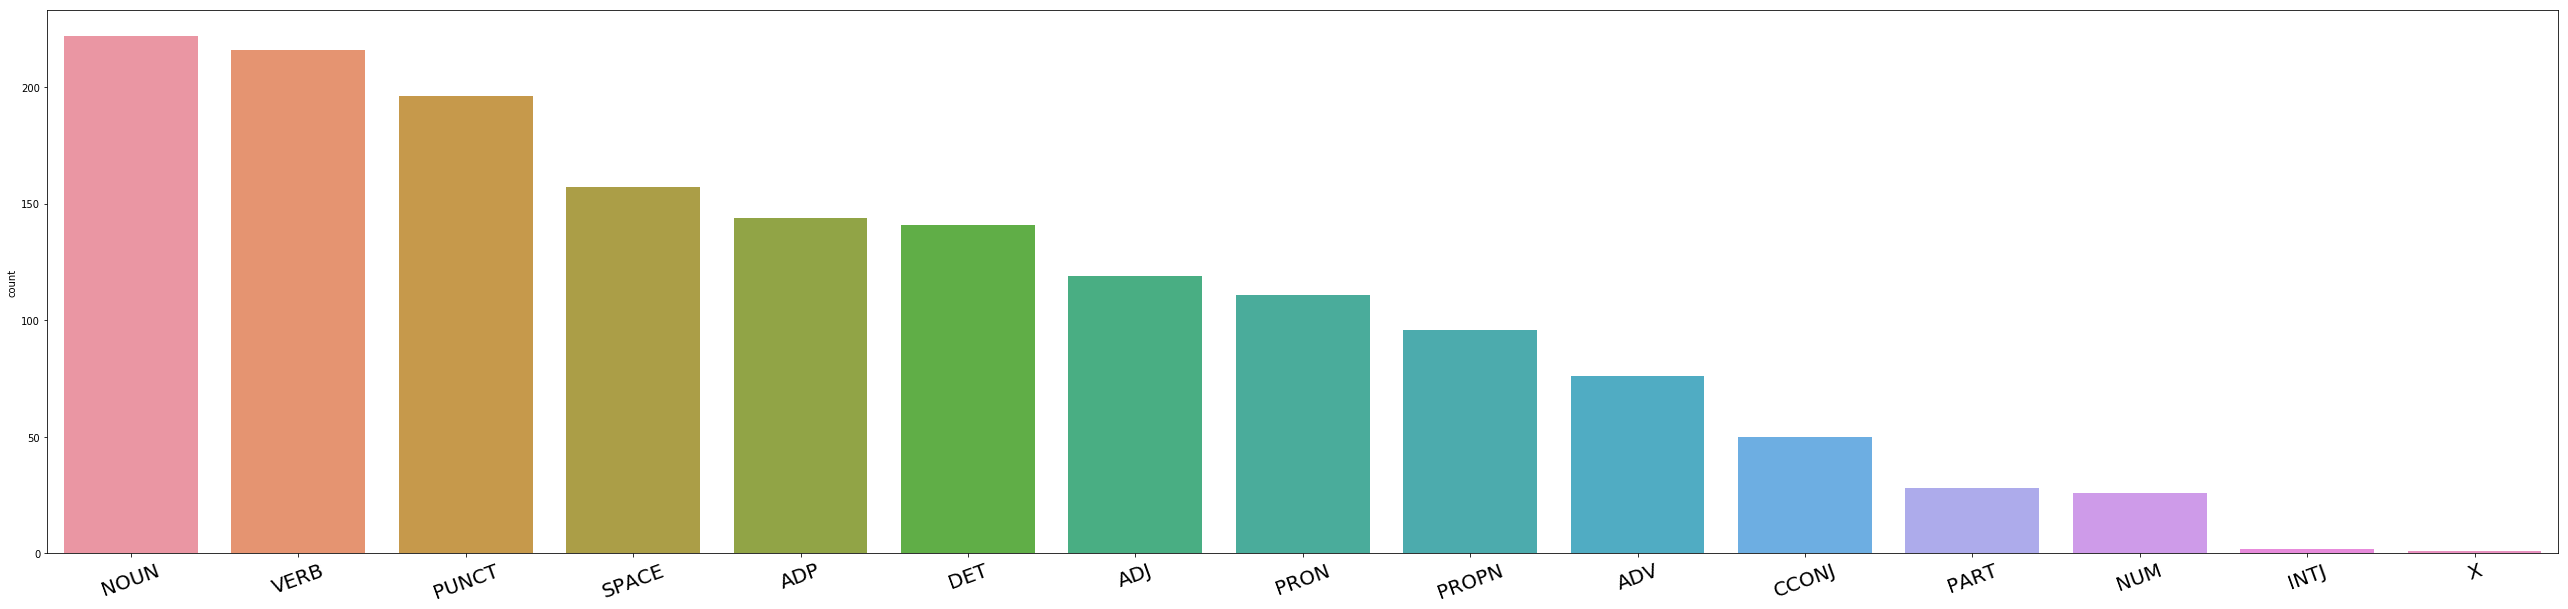

In [84]:
# frequency plot:
plt.figure(figsize=(45,10))
sns.countplot(pos, order=pd.Series(pos).value_counts().index)
plt.xticks(rotation=20, fontsize=20)
plt.show()

NOUN has the highest frequency, which is quite similar to VERB. PUNCT has less than NOUN and VERB, and then some space.

## Q3. (10 pts.) Make wordclouds for 5 books
- Use the [```word_cloud```](https://github.com/amueller/word_cloud) package.
- (8 pts.) Create a wordcloud for 5 books that you choose.
  - The author of each book should be different.
- (2pts.) Provide your interpretation.

In [88]:
# check the author: 
names = []
for i in range(2,7):
    names.append(metadata[i]['Author'])
names

[[u'E. (Edith) Nesbit'],
 [u'William Habington'],
 [u'James Richardson'],
 [u'Shoghi Effendi'],
 [u'George John Romanes']]

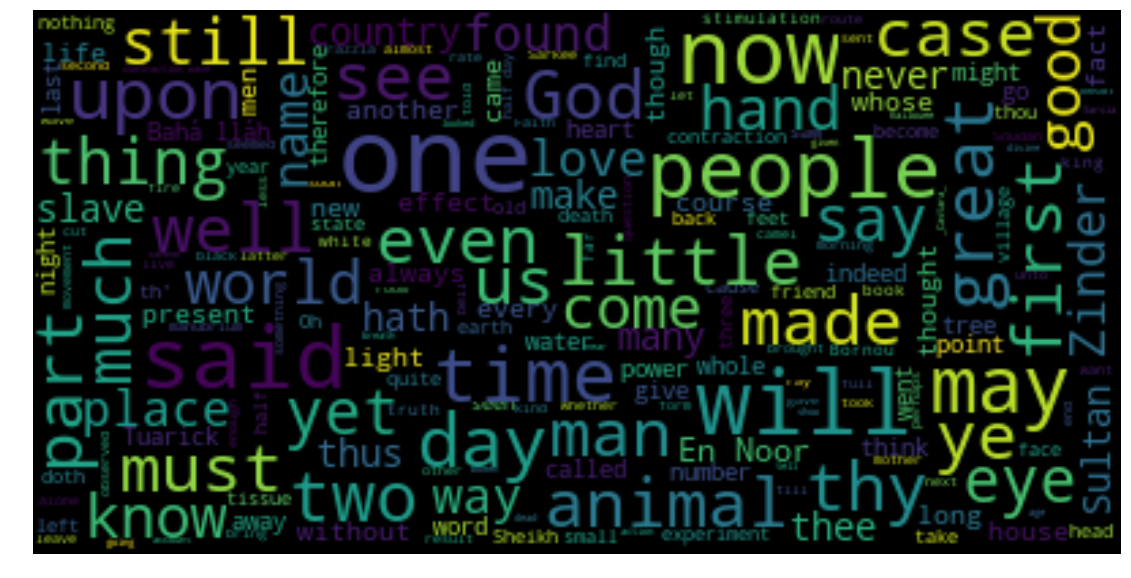

In [87]:
# word cloud of original text
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# lower max_font_size
wordcloud = WordCloud(max_font_size=40).generate(text)
plt.figure(figsize=(45,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

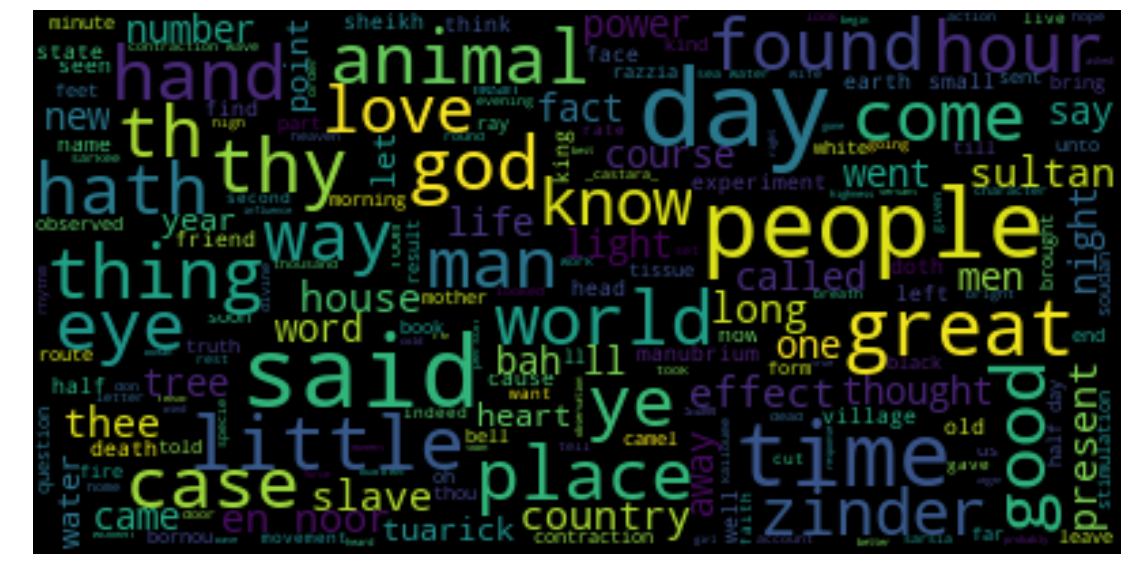

In [89]:
# word cloud of adjusted removed new text
text_adj = ' '.join(sent_low_pnct[2:7])
wordcloud = WordCloud(max_font_size=40).generate(text_adj)
plt.figure(figsize=(45,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

According tot he wordclouds of original 5 books, we can see some words obviously, such as 'now', 'still', 'will', 'little'. It contains some 'STOP_WORDS', and may influence our interpretation. Then, we use the adjusted 5 books text from Q1, it suggests words, such as 'people', 'said', 'god', 'place'. It has more meaningful words and may indicate the stroy of book is about some people and happen in some place.

## Q4. (bonus 5 pts.) Train your own word2vec vector.
- Use the ```gensim``` package
  - Your input will be the output from Q1 (cleaned data)
- Hint: You can look into this tutorial for training the new Word2Vec model: https://rare-technologies.com/word2vec-tutorial/
- Use default parameters when you train the Word2Vec model (e.g., ```min_count```, ```size```, etc.), except the number of workers (```workers=?```) parameter.
- Use this model for the later questions. 
  - **If you do not have your Word2Vec model, please use the pre-trained model that we used for the lab to answer the later questions**

In [253]:
# import modules & set up logging
import gensim
# a sequence of sentences as its input. Each sentence a list of words (utf8 strings):
sentences2 = [sens.split() for sens in sent_low_pnct]

In [254]:
# A reasonable value for min_count is between 0-100, depending on the size of your dataset.
# Another parameter is the size of the NN layers, which correspond to the “degrees” of freedom the training algorithm has:
# Bigger size values require more training data, but can lead to better (more accurate) models. Reasonable values are in the tens to hundreds.

model = gensim.models.Word2Vec(sentences2, min_count=10)

In [258]:
model.most_similar(positive=['student'])

/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[(u'study', 0.7672994136810303),
 (u'scholar', 0.7541213631629944),
 (u'mathematics', 0.7356328964233398),
 (u'students', 0.7333097457885742),
 (u'teacher', 0.7263144254684448),
 (u'studies', 0.7247477769851685),
 (u'pupil', 0.7164220809936523),
 (u'instructor', 0.7156684994697571),
 (u'undergraduate', 0.7143568992614746),
 (u'lecturer', 0.6968077421188354)]

In [259]:
# You can store/load models using the standard gensim methods:
model.save('/tmp/mymodel')
# new_model = gensim.models.Word2Vec.load('/tmp/mymodel')

## Q5. (15 pts.) Similarity from Word2Vec 
- Choose 5 words
- (5pts.) What are the top-10 similar words of each?
- (5pts.) Do you find anything odd or interesting? Please explanation. 
  - (if you have your own word2vec model)How the results are different from the pre-trained model that we used in the lab?

In [5]:
import gensim
# from https://github.com/eyaler/word2vec-slim
model = gensim.models.KeyedVectors.load_word2vec_format("./618_07_NLP/GoogleNews-vectors-negative300-SLIM.bin", binary=True)

In [260]:
model.most_similar('school')

/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[(u'schools', 0.8153811693191528),
 (u'college', 0.7982160449028015),
 (u'teacher', 0.7338548898696899),
 (u'pupils', 0.7258292436599731),
 (u'teachers', 0.705106794834137),
 (u'lessons', 0.7029070258140564),
 (u'kindergarten', 0.6979957818984985),
 (u'seminary', 0.6856667399406433),
 (u'training', 0.6760119795799255),
 (u'education', 0.6511869430541992)]

In [261]:
model.most_similar('great')

/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[(u'greatest', 0.8230201601982117),
 (u'greater', 0.7577997446060181),
 (u'considerable', 0.7093802690505981),
 (u'vast', 0.7015920877456665),
 (u'prodigious', 0.6676942706108093),
 (u'enormous', 0.6639443635940552),
 (u'tremendous', 0.6610711812973022),
 (u'utmost', 0.6564987301826477),
 (u'equal', 0.6329184770584106),
 (u'large', 0.6257853507995605)]

In [262]:
model.most_similar('graduate')

/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[(u'harvard', 0.8532997369766235),
 (u'yale', 0.8128983378410339),
 (u'graduated', 0.8035120368003845),
 (u'graduates', 0.7906697988510132),
 (u'university', 0.7772150635719299),
 (u'college', 0.7501184940338135),
 (u'seminary', 0.749595582485199),
 (u'graduation', 0.7416119575500488),
 (u'graduating', 0.7377542853355408),
 (u'instructors', 0.7364984154701233)]

In [263]:
model.most_similar('expensive')

/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[(u'cheap', 0.8293471336364746),
 (u'cheaper', 0.7547671794891357),
 (u'economical', 0.7545278072357178),
 (u'inexpensive', 0.7514330744743347),
 (u'conveniences', 0.7253854274749756),
 (u'costly', 0.7041037678718567),
 (u'housekeeping', 0.7011684775352478),
 (u'buying', 0.6973338723182678),
 (u'manufacture', 0.6955265402793884),
 (u'manufactured', 0.6935995817184448)]

In [264]:
model.most_similar('tiger')

/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[(u'wolf', 0.8449286222457886),
 (u'panther', 0.8383983373641968),
 (u'snake', 0.8114651441574097),
 (u'leopard', 0.7930834293365479),
 (u'hound', 0.7840303182601929),
 (u'lion', 0.782440185546875),
 (u'boar', 0.7780333161354065),
 (u'elephant', 0.7752401828765869),
 (u'hawk', 0.7530784606933594),
 (u'stag', 0.7420225143432617)]

In [265]:
print(model.similarity('school', 'great'))
print(model.similarity('school', 'graduate'))
print(model.similarity('school', 'expensive'))
print(model.similarity('school', 'tiger'))

0.2986694
0.61586314
0.34960327
-0.054058574


/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  """Entry point for launching an IPython kernel.
/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  
/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  after removing the cwd from sys.path.


Do you find anything odd or interesting? Please explanation.
The similar words has changed by this new model I made. And we can obviously notice that similarity between'school', 'tiger' even becomes negative, which is quite interesting, becasue it used to be positive and about 0.07. I think with lots of books (4000), new model seems to have a quite different similarity results against same words.

Following are the similarity of same words by original w2v_mod model:

0.07790809001676818

0.37479000330446494

0.06282920015368976

0.08660267014184596

## Q6. (20 pts.) Similarity between chapters 
- (5 pts.) Pick 5 chapters from the dataset and describe.
  - Each "chapter" consists of 10 consecutive paragraphs from a single book.
  - The author of each chapter should be different.
  - If necessary, explain how you defined "paragraph". 
- (5 pts.) Calculate the average of vectors for the words included in a chapter.  
  - In this way, you can have a vector that can roughly summarize the contents.    
  - The average vector should have the same dimensionality with word vectors 
    - e.g., if the word vector is a 100 dimension, the average vector for paragraph should be a 100 dimension as well
  - Words should come from the results of Q1 (cleaned out data) (i.e. should not contain stopwords or other special characters).
- (5 pts.) Calculate the similarity between chapters.  
  - Provide your interpretation. 
  - Why do you think some chapters are similar/dissimilar to others?

In [26]:
text[0][:100]

u"ENLARGE TO FULL SIZE\n\n\n\n\tCONTENTS\n\n\n\tCASANOVA AT DUX\n\n\tTRANSLATOR'S PREFACE\n\n\tAUTHOR'S PREFACE\n\n\n\tTH"

In [87]:
# Find 5 chapters with specific requirements first by original file and then repeat Q1 methods
# \n\n represents for the paragraph separators
# Some books have 'chapter' or 'CHAPTER' words directly; 
# and usually after the 'chapter' line, there will be a blank line
# number of paragraph = text.count('\n\n') + 1
import re
word = 'chapter' # 'chapter' CHAPTER
separator = '\n\n'
select_cha = []
select_num = 5
count = 0
for i in range(len(text)):
    count_cha = [m.start() for m in re.finditer(word, text[i])] # find all 'chapter' position in one book
    if count_cha:
        for cha_j in range(len(count_cha)-1):
            cha1 = text[0][count_cha[cha_j]:count_cha[cha_j+1]] # text for each chapter
            count_sep = [m.start() for m in re.finditer(separator, cha1)] # find all '\n\n' position in a chapter
            if len(count_sep) > 10: # at least 10 consecutive paragraphs
                select_cha.append(cha1)
                count += 1
                break # we need chapters from different books; break only one from the nested loop
    if count == select_num: # we only need select_num of chapters
        break    

In [93]:
# repeat Q1 methods to remove useless string 
# convert to lowercase
import re
select_cha_low = len(select_cha)*[0]
for i in range(len(select_cha)):
    select_cha_low[i] = select_cha[i].lower()
# stop words
from spacy.lang.en.stop_words import STOP_WORDS
select_cha_nostop = len(select_cha)*[0]
for i in range(len(select_cha_low)):
    temp = select_cha_low[i]
    words = temp.split()
    words_nostop = [word for word in words if word not in STOP_WORDS]
    join_nostop = ' '.join(words_nostop)
    select_cha_nostop[i] = join_nostop
# use regular expression to remove punctuation:
# special character `\n` (linebreak) 
import os
# os.linesep : '\n'
select_cha_adjusted = len(select_cha_nostop)*[0]
for i in range(len(select_cha_adjusted)):
    temp = select_cha_nostop[i]
    temo_low_pnct = re.sub(r'[^\w\s]', ' ', temp) # remove punctuation
    temo_low_pnct = re.sub(r'\d', " ", temo_low_pnct) # remove digits
    temo_low_pnct = temo_low_pnct.replace(os.linesep, "") # remove \n
    select_cha_adjusted[i] = temo_low_pnct

In [121]:
# check the number of seleted vector and words in chapters
print(len(select_cha_adjusted))
print([len(select_cha_adjusted[i].split()) for i in range(len(select_cha_adjusted))])

5
[1982, 1919, 7863, 1592, 2052]


In [266]:
# Calculate the average word vector
# if the word vector is a 100 dimension, the average vector for paragraph should be a 100 dimension as well
word_vec = [0] * len(select_cha_adjusted)
text_vector = []
for i in range(len(select_cha_adjusted)):
    temp = select_cha_adjusted[i]
    mean_cal = []
    for word in temp.split():
        try: 
            mean_cal.append(np.mean(model[word])) 
        except:
            mean_cal.append(np.nan)    
#     text_vector = np.mean([model[word] for word in temp.split()], axis=1)
    word_vec[i] = mean_cal

/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:10: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # Remove the CWD from sys.path while we load stuff.


In [267]:
# Check the number of words in each chapter and 
word__vec_len = [len(word_vec[i]) for i in range(len(word_vec))] # check NAN in above procedure
print(word__vec_len)
# pd.DataFrame(word_vec[1]).isnull().sum()

[1982, 1919, 7863, 1592, 2052]


In [268]:
# drop nan in the word_vec, which might not in the model
word_vec_dropna = [pd.DataFrame(word_vec[i]).dropna() for i in range(len(word_vec))] 
word_len = [len(word_vec_dropna[i]) for i in range(len(word_vec_dropna))] # check NAN in above procedure
print(word_len)

[1946, 1887, 7833, 1558, 2049]


In [269]:
# Calculate the similarity between chapters.
# Cosine similarity: Often used to measure similarity between vectors: 
# https://en.wikipedia.org/wiki/Cosine_similarity

# Length of array should be the same!!!
# reduce to the same smallest length 
import math
limit = min(word_len)
word_vec_same_len = [0] * limit
for i, item in enumerate(word_vec_dropna):
    if len(item) >= limit:
        word_vec_same_len[i] = item[:limit]
word_vec_same_len_cal = [len(word_vec_same_len[i]) for i in range(5)]
print(word_vec_same_len_cal)

[1558, 1558, 1558, 1558, 1558]


In [270]:
# Euclidean distance
distance_eu = pd.DataFrame(index=range(5), columns=range(5))
for i in range(5):
    for j in range(i,5):
        x = np.array(word_vec_same_len[i])
        y = np.array(word_vec_same_len[j])
        distance_eu.iloc[i,j] = math.sqrt(sum([(a - b) ** 2 for a, b in zip(x, y)]))
distance_eu

,0,1,2,3,4
0,0,6.45329,6.11148,6.58543,6.23278
1,NaN,0,6.54168,6.76894,6.66886
2,NaN,NaN,0,6.46489,5.88659
3,NaN,NaN,NaN,0,6.53038
4,NaN,NaN,NaN,NaN,0


In [271]:
# Manhattan distance
distance_ma = pd.DataFrame(index=range(5), columns=range(5))
for i in range(5):
    for j in range(i,5):
        x = np.array(word_vec_same_len[i])
        y = np.array(word_vec_same_len[j])
        distance_ma.iloc[i,j] = math.sqrt(sum([np.abs(a - b) for a, b in zip(x, y)]))
distance_ma

,0,1,2,3,4
0,0,13.9103,13.7669,13.9946,13.8512
1,NaN,0,14.1523,14.2111,14.2267
2,NaN,NaN,0,14.0676,13.5824
3,NaN,NaN,NaN,0,14.0624
4,NaN,NaN,NaN,NaN,0


From the calculation of Euclidean and Manhattan distance, they have the same sorted sequence. 4 and 2 chapters are most closed, as they have the lowest two kinds of distance, meaning they have some similiartyi. On the opposite, 1 and 3 has the largest two kinds of distance, so they have less similarity. But the difference between these distance are pretty small, meaning the differnece between the similiarity are small.

I think the closet chapters are similar to others because they may have some percentage of words overlapped, and they may describe the same type of stories situations, or assumed to happene in the same history.

## Q7. (15 pts.) Word clustering
- Pick top-100 similar words with the word *information*.  
- Calculate cosine similarity scores between words
  - e.g., Create a 100x100 matrix that contains cosine similarity scores. Each row and columns should be words. 
- Use seaborn's [```.clustermap()```](https://seaborn.pydata.org/generated/seaborn.clustermap.html) function to draw a hierarchically-clustered heatmap
- Provide your interpretation

In [272]:
top100 = model.most_similar('information', topn=100)
top100 = [tup[0] for tup in top100]
cosine = np.empty((100,100))
for i in range(100):
    for j in range(100):
        cosine[i][j] = model.similarity(top100[i], top100[j])
cosine

/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.
/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  


array([[0.99999994, 0.68535954, 0.47384894, ..., 0.45864767, 0.42638865,
        0.639889  ],
       [0.68535954, 1.        , 0.48408636, ..., 0.47718585, 0.60401356,
        0.60346496],
       [0.47384894, 0.48408636, 1.        , ..., 0.54083592, 0.37299669,
        0.32530802],
       ...,
       [0.45864767, 0.47718585, 0.54083592, ..., 1.        , 0.33473238,
        0.37043452],
       [0.42638865, 0.60401356, 0.37299669, ..., 0.33473238, 1.        ,
        0.51416552],
       [0.639889  , 0.60346496, 0.32530802, ..., 0.37043452, 0.51416552,
        1.        ]])

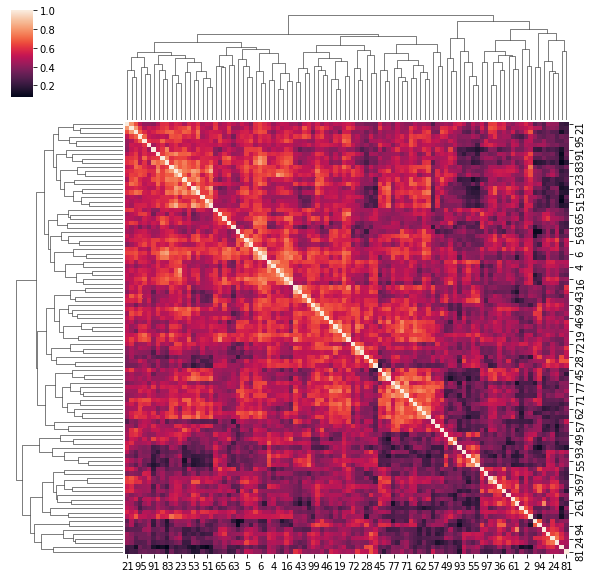

In [273]:
sns.clustermap(cosine)

From above matrix and plots, it seems the color is quite red, which means the correlation between 'information' and its most similiar words in this model do have a highly closed similiarity. The matrix also suggests that some cosine similarity is about 0.68535954, or above 0.6, which is quite high, supporting the conlcusion. And the clustor seems to link the msot closed words, such as first 3 words are closed with each other, so they are linked together. 